In [1]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import NormalDist

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import NormalDist

price_files = [
    "/users/eleves-a/2023/emeric.payer/Documents/IMC/2025_data_bottles1/prices_round_1_day_-2.csv",
    "/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_-1.csv",
    "/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_0.csv",
    "/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_1.csv",
    "/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_3_day_2.csv"
]

# Map day index to timestamp offset
day_offsets = {
    0: 0,
    1: 1_000_000,
    2: 2_000_000,
    3 : 3_000_000,
    4: 4_000_000
}

dfs = []

for i, file in enumerate(price_files):
    df = pd.read_csv(file)
    df = df.iloc[:, 0].str.split(";", expand=True)
    df.columns = [
        "day", "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss"
    ]
    
    # Convert numeric columns
    numeric_cols = df.columns.difference(["day", "timestamp", "product"])
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    
    # Convert and shift timestamp
    df["timestamp"] = df["timestamp"].astype(int) + day_offsets[i]
    
    dfs.append(df)

# Concatenate all days into one dataframe
df = pd.concat(dfs, ignore_index=True)

PermissionError: [Errno 13] Permission denied: '/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_1_day_-2.csv'

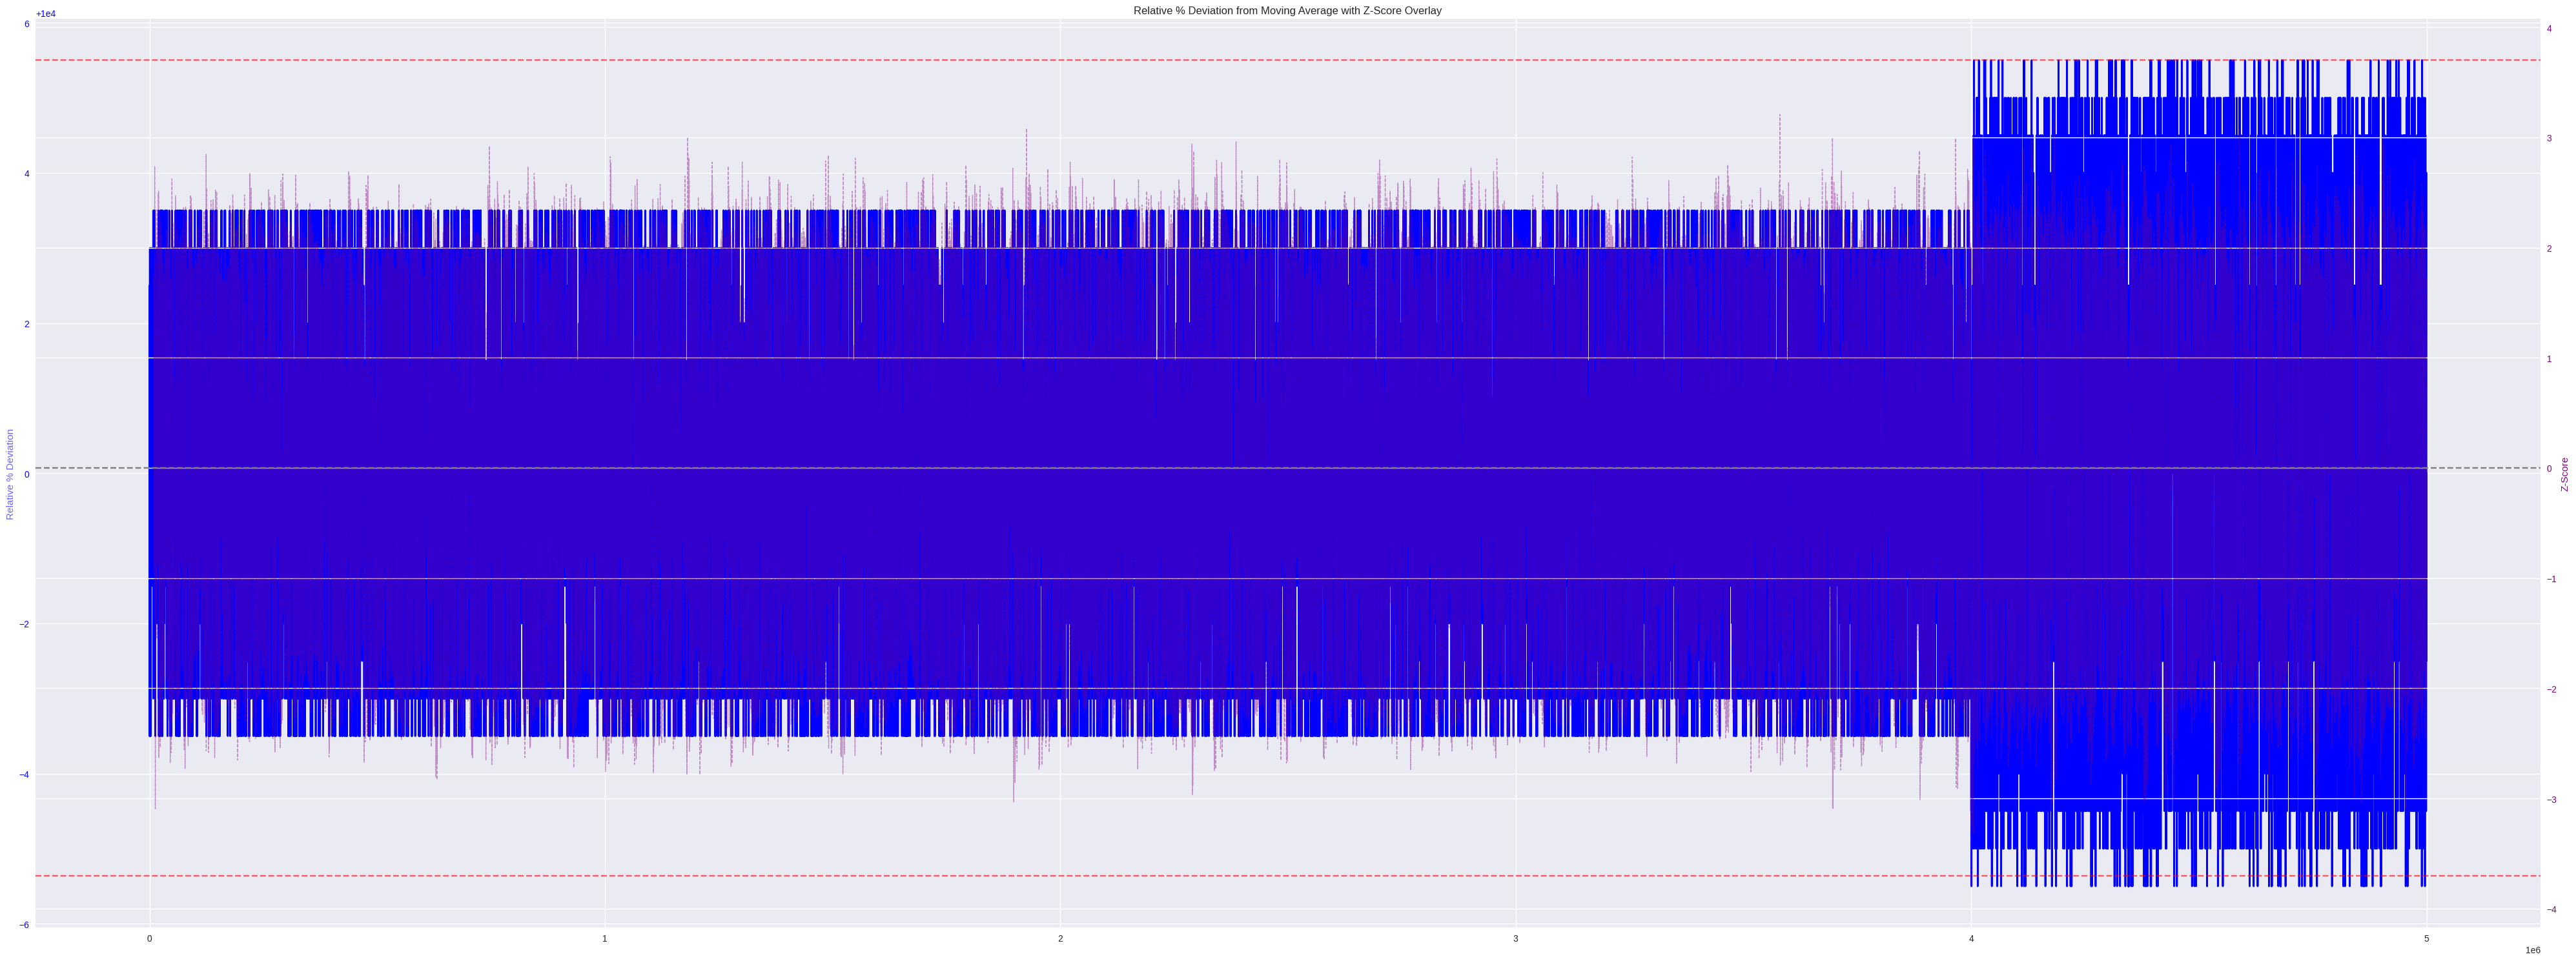

In [41]:
RAINFOREST_RESIN_df = df.loc[df['product']=='RAINFOREST_RESIN'].copy()
window = 100  # rolling window

# === Compute mid price, moving average, std, and percentage deviation ===
RAINFOREST_RESIN_df['mid_price'] = (RAINFOREST_RESIN_df['ask_price_1'] + RAINFOREST_RESIN_df['bid_price_1']) / 2
RAINFOREST_RESIN_df['ma'] = RAINFOREST_RESIN_df['mid_price'].rolling(window).mean()
RAINFOREST_RESIN_df['std'] = RAINFOREST_RESIN_df['mid_price'].rolling(window).std()
RAINFOREST_RESIN_df['z_score'] = (RAINFOREST_RESIN_df['mid_price'] - RAINFOREST_RESIN_df['ma']) / RAINFOREST_RESIN_df['std']
RAINFOREST_RESIN_df['relative_diff'] = 100 * (RAINFOREST_RESIN_df['mid_price'] - RAINFOREST_RESIN_df['ma']) / RAINFOREST_RESIN_df['ma']

# === Plot: Relative % Deviation and Z-score ===
fig, ax1 = plt.subplots(figsize=(40, 15))

# Z-score (background)
ax2 = ax1.twinx()
ax2.plot(RAINFOREST_RESIN_df['timestamp'], RAINFOREST_RESIN_df['z_score'], label='Z-Score',
         color='purple', linestyle='--', linewidth=1, alpha=0.4, zorder=1)
ax2.axhline(0, linestyle='--', color='gray', zorder=1)
ax2.axhline(3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.axhline(-3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.set_ylabel("Z-Score", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Relative % deviation (foreground)
ax1.plot(RAINFOREST_RESIN_df['timestamp'], RAINFOREST_RESIN_df['mid_price'],
         label='Relative % Difference from MA', color='blue', linewidth=2, zorder=2)
ax1.set_ylabel("Relative % Deviation", color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

plt.title("Relative % Deviation from Moving Average with Z-Score Overlay")
fig.tight_layout()
plt.grid(True)
plt.show()


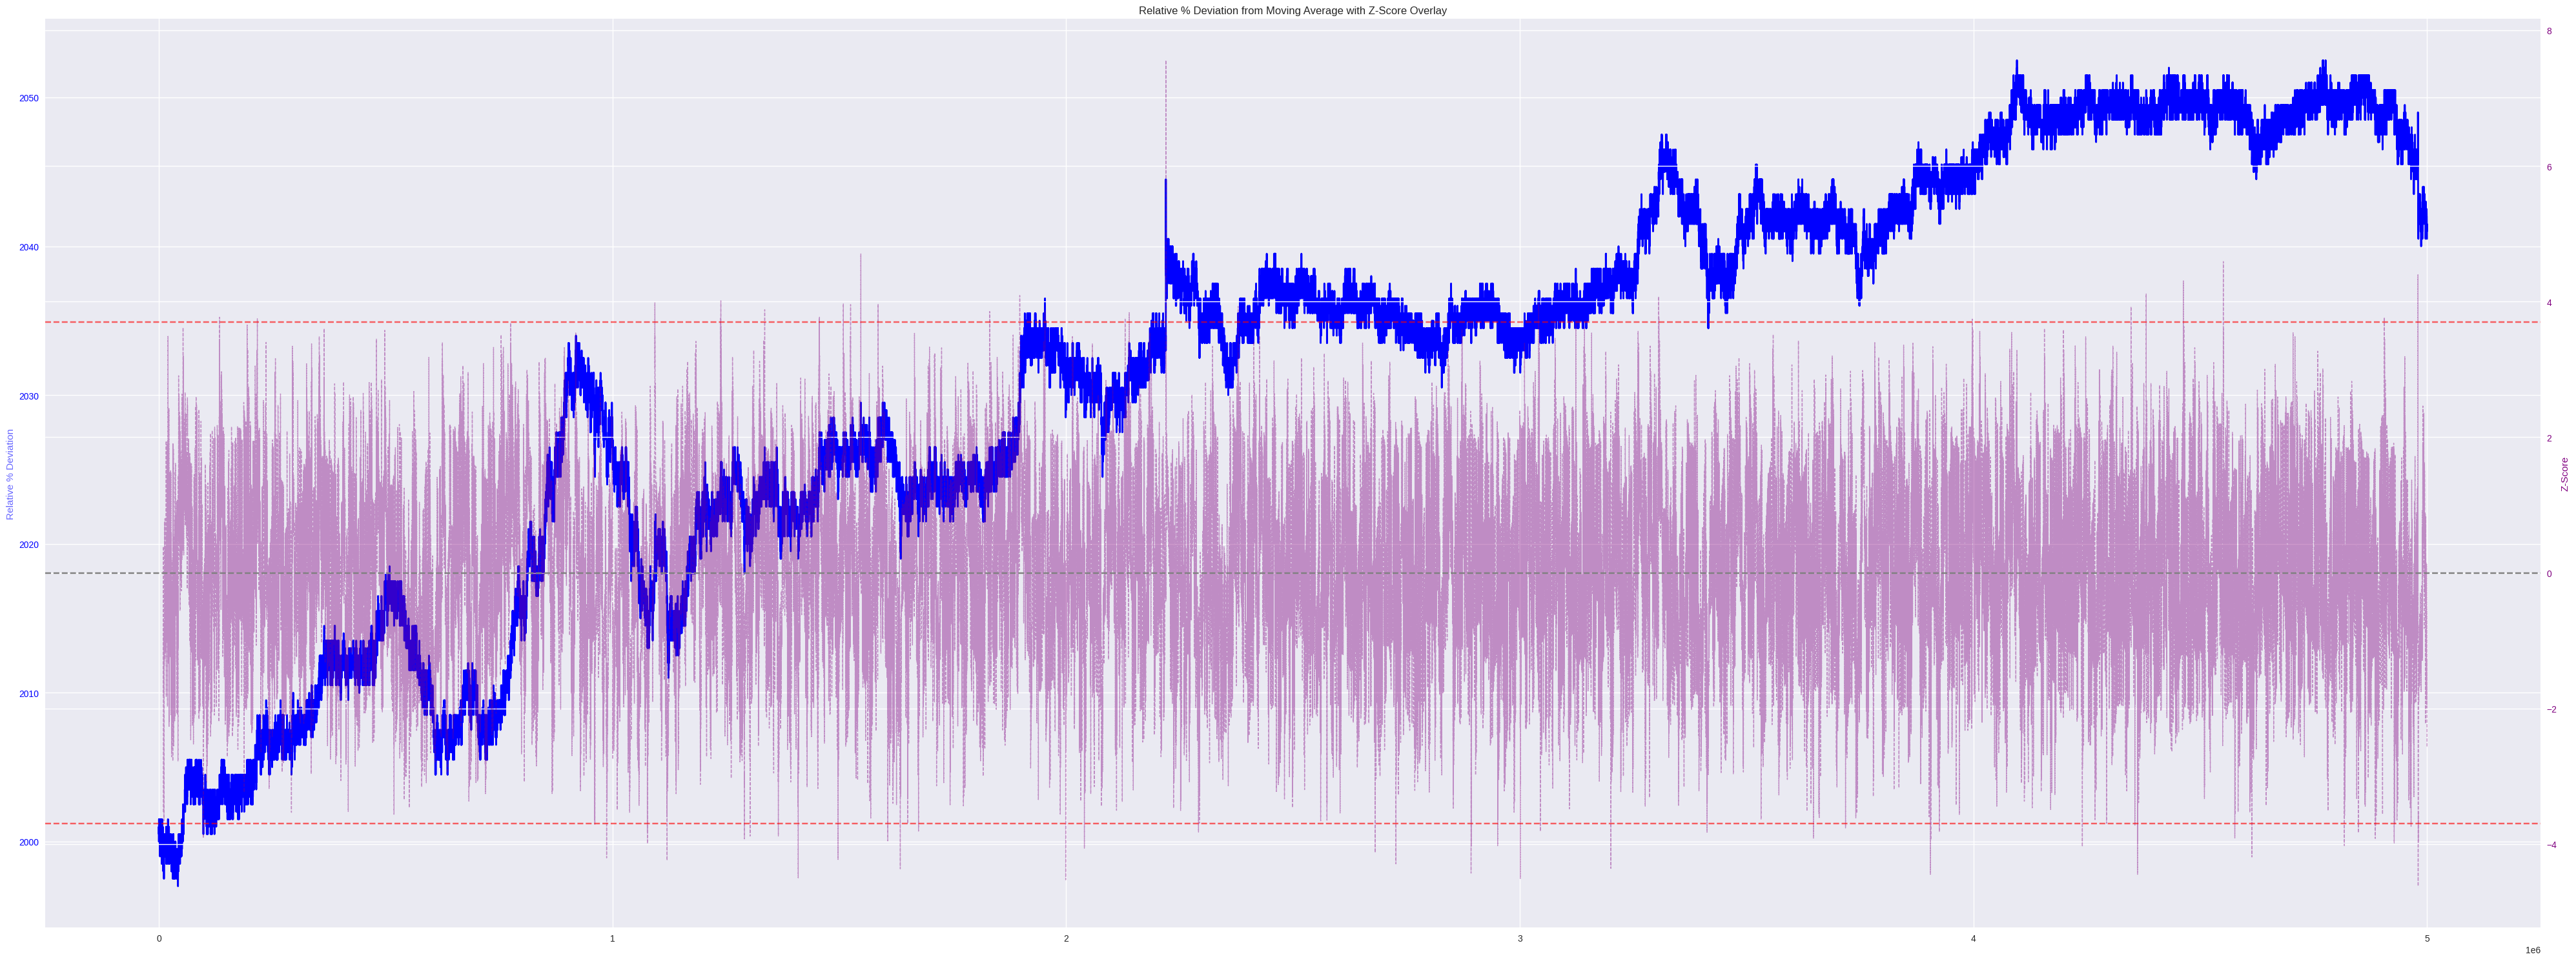

In [33]:
#KELP PRICE EVOLUTION


KELP_df = df.loc[df['product']=='KELP'].copy()
window = 100  # rolling window

# === Compute mid price, moving average, std, and percentage deviation ===
KELP_df['mid_price'] = (KELP_df['ask_price_1'] + KELP_df['bid_price_1']) / 2
KELP_df['ma'] = KELP_df['mid_price'].rolling(window).mean()
KELP_df['std'] = KELP_df['mid_price'].rolling(window).std()
KELP_df['z_score'] = (KELP_df['mid_price'] - KELP_df['ma']) / KELP_df['std']
KELP_df['relative_diff'] = 100 * (KELP_df['mid_price'] - KELP_df['ma']) / KELP_df['ma']

# === Plot: Relative % Deviation and Z-score ===
fig, ax1 = plt.subplots(figsize=(40, 15))

# Z-score (background)
ax2 = ax1.twinx()
ax2.plot(KELP_df['timestamp'], KELP_df['z_score'], label='Z-Score',
         color='purple', linestyle='--', linewidth=1, alpha=0.4, zorder=1)
ax2.axhline(0, linestyle='--', color='gray', zorder=1)
ax2.axhline(3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.axhline(-3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.set_ylabel("Z-Score", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Relative % deviation (foreground)
ax1.plot(KELP_df['timestamp'], KELP_df['mid_price'],
         label='Relative % Difference from MA', color='blue', linewidth=2, zorder=2)
ax1.set_ylabel("Relative % Deviation", color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

plt.title("Relative % Deviation from Moving Average with Z-Score Overlay")
fig.tight_layout()
plt.grid(True)
plt.show()


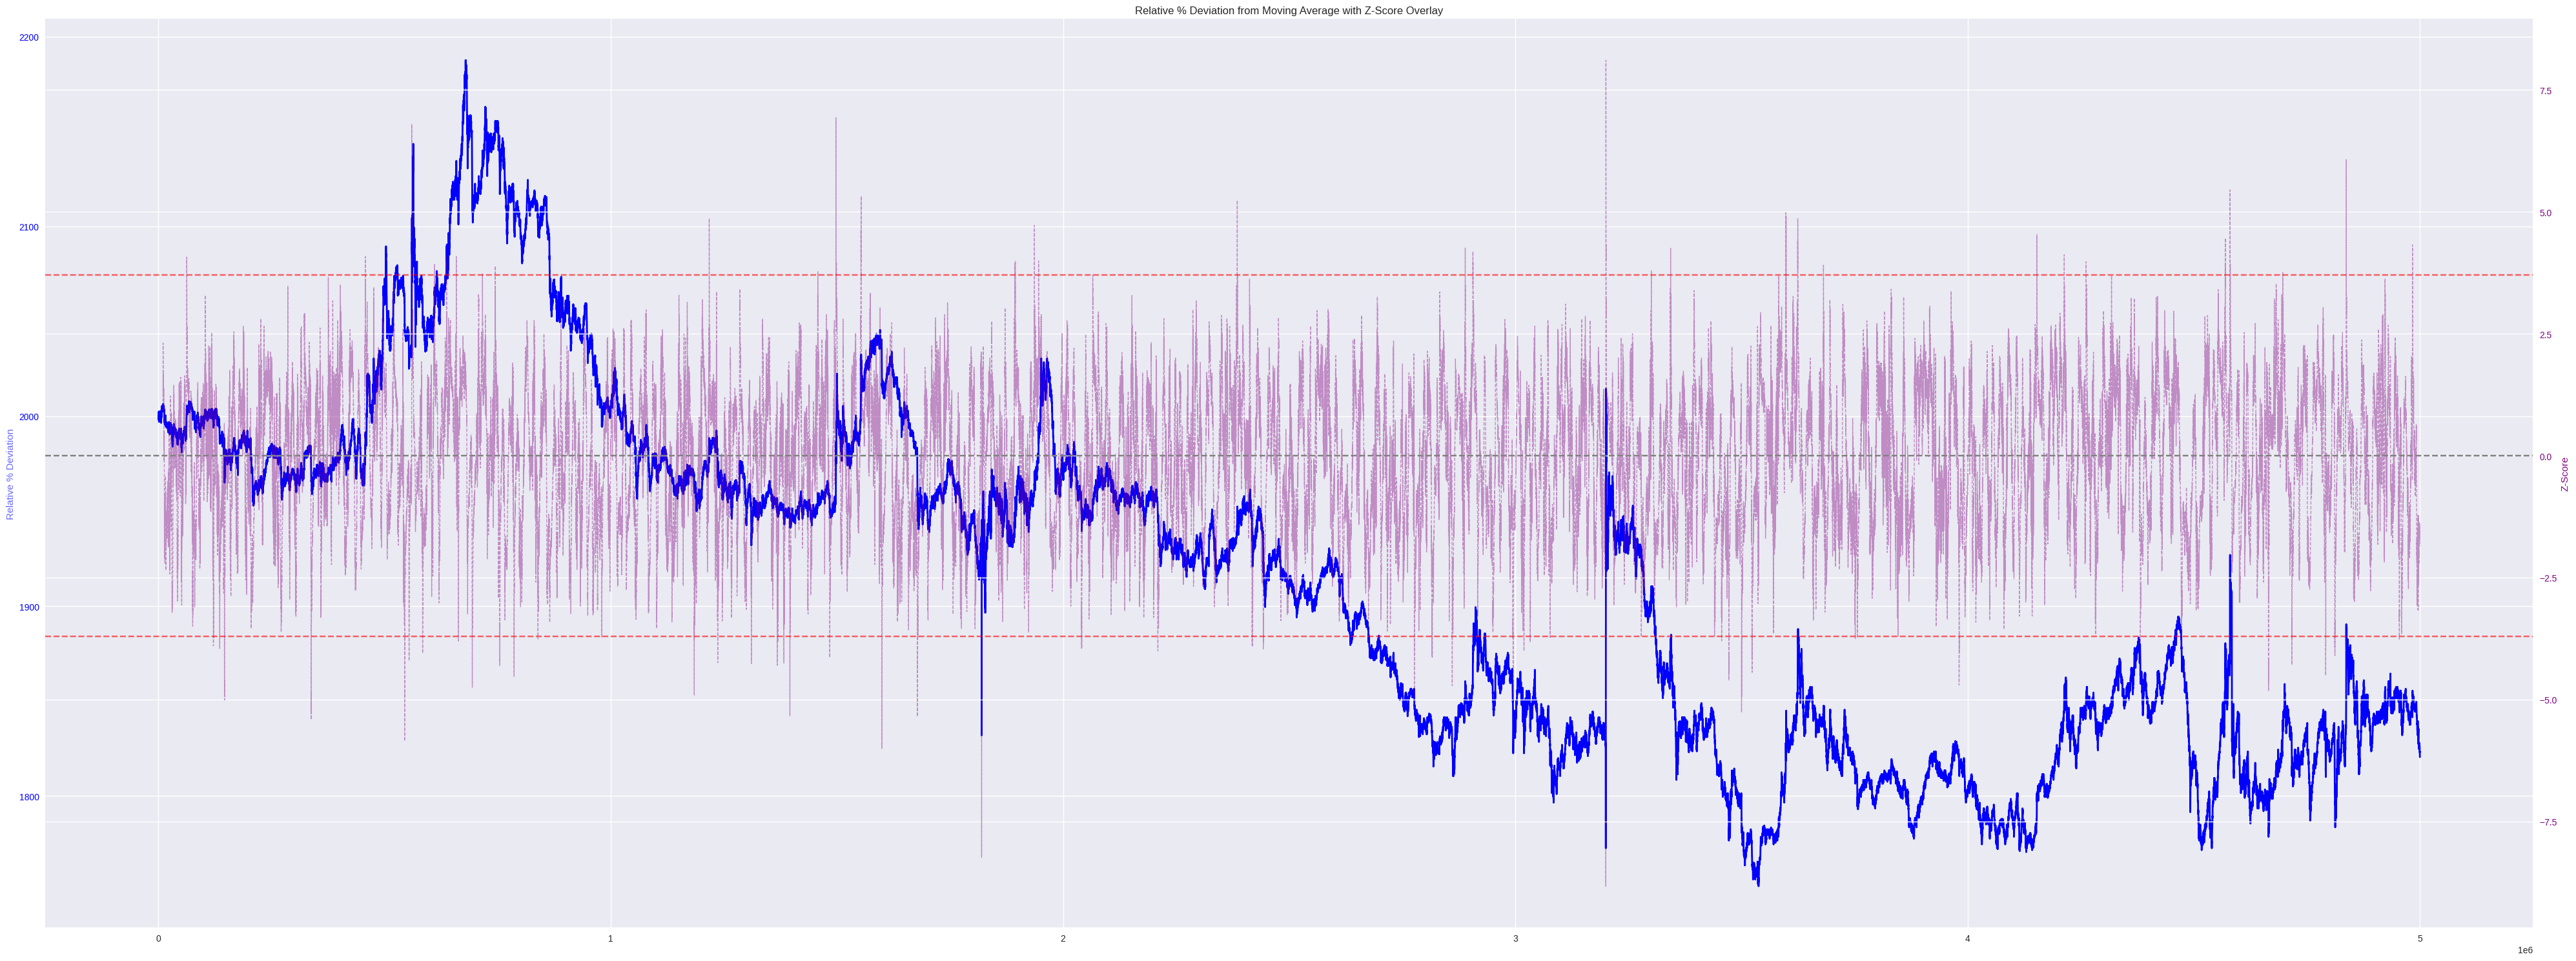

In [32]:
#SQUID INK PRICE EVOLUTION


SQUID_INK_df = df.loc[df['product']=='SQUID_INK'].copy()
window = 100  # rolling window

# === Compute mid price, moving average, std, and percentage deviation ===
SQUID_INK_df['mid_price'] = (SQUID_INK_df['ask_price_1'] + SQUID_INK_df['bid_price_1']) / 2
SQUID_INK_df['ma'] = SQUID_INK_df['mid_price'].rolling(window).mean()
SQUID_INK_df['std'] = SQUID_INK_df['mid_price'].rolling(window).std()
SQUID_INK_df['z_score'] = (SQUID_INK_df['mid_price'] - SQUID_INK_df['ma']) / SQUID_INK_df['std']
SQUID_INK_df['relative_diff'] = 100 * (SQUID_INK_df['mid_price'] - SQUID_INK_df['ma']) / SQUID_INK_df['ma']

# === Plot: Relative % Deviation and Z-score ===
fig, ax1 = plt.subplots(figsize=(40, 15))

# Z-score (background)
ax2 = ax1.twinx()
ax2.plot(SQUID_INK_df['timestamp'], SQUID_INK_df['z_score'], label='Z-Score',
         color='purple', linestyle='--', linewidth=1, alpha=0.4, zorder=1)
ax2.axhline(0, linestyle='--', color='gray', zorder=1)
ax2.axhline(3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.axhline(-3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.set_ylabel("Z-Score", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Relative % deviation (foreground)
ax1.plot(SQUID_INK_df['timestamp'], SQUID_INK_df['mid_price'],
         label='Relative % Difference from MA', color='blue', linewidth=2, zorder=2)
ax1.set_ylabel("Relative % Deviation", color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

plt.title("Relative % Deviation from Moving Average with Z-Score Overlay")
fig.tight_layout()
plt.grid(True)
plt.show()

Spread mean over all days: 60.7440625


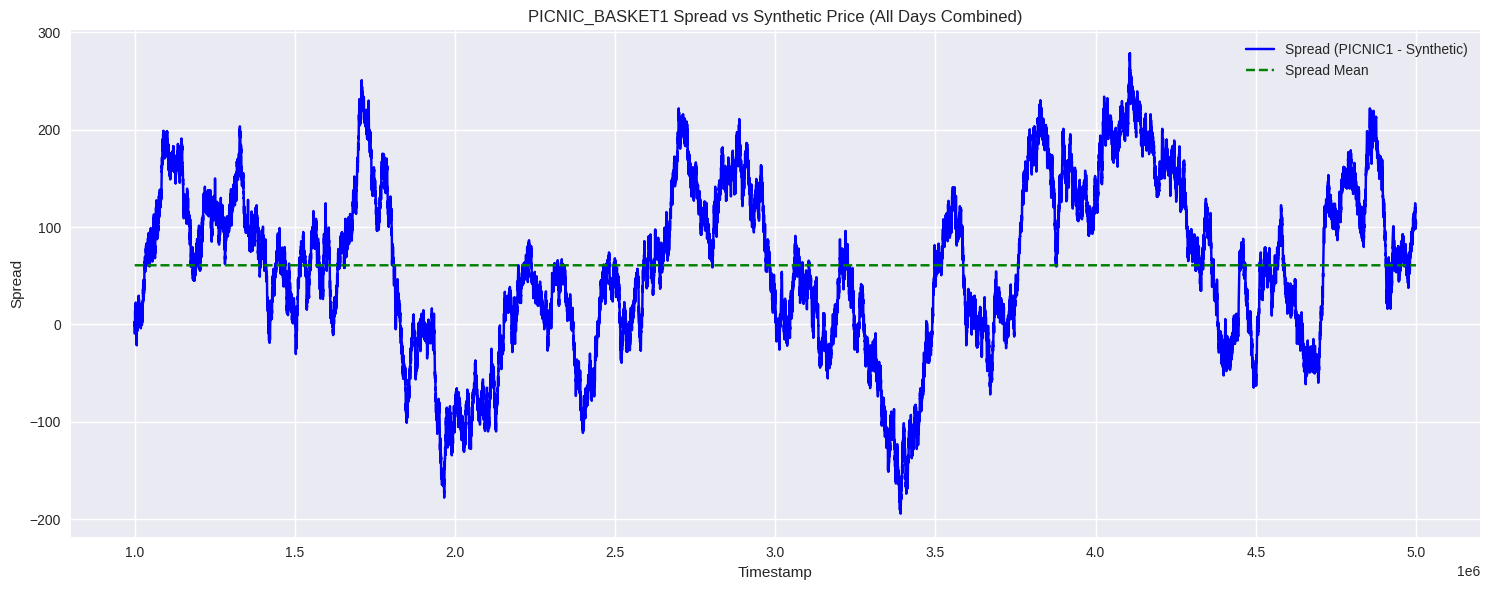

In [36]:
#SPREAD PICNIC 1

import matplotlib.pyplot as plt
import pandas as pd

# Combine all your daily DataFrames into one thats df

# Filter by product
picnic1_df = df.loc[df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Merge on timestamp
merged_df = picnic1_df.merge(croissant_df, on='timestamp', how='inner')\
                      .merge(djembes_df, on='timestamp', how='inner')\
                      .merge(jams_df, on='timestamp', how='inner')\
                      .dropna()

# Calculate synthetic price and spread
merged_df['weighted'] = 6 * merged_df['croissant'] + 1 * merged_df['djembes'] + 3 * merged_df['jams']
merged_df['spread'] = merged_df['picnic1'] - merged_df['weighted']

# Compute overall spread mean
spread_mean = merged_df['spread'].mean()
print("Spread mean over all days:", spread_mean)

# Add mean line for plotting
merged_df['mean'] = spread_mean

# Plot
plt.figure(figsize=(15, 6))
plt.plot(merged_df['timestamp'], merged_df['spread'], label='Spread (PICNIC1 - Synthetic)', color='blue')
plt.plot(merged_df['timestamp'], merged_df['mean'], label='Spread Mean', color='green', linestyle='--')

plt.title("PICNIC_BASKET1 Spread vs Synthetic Price (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Spread mean over all days: 31.447125


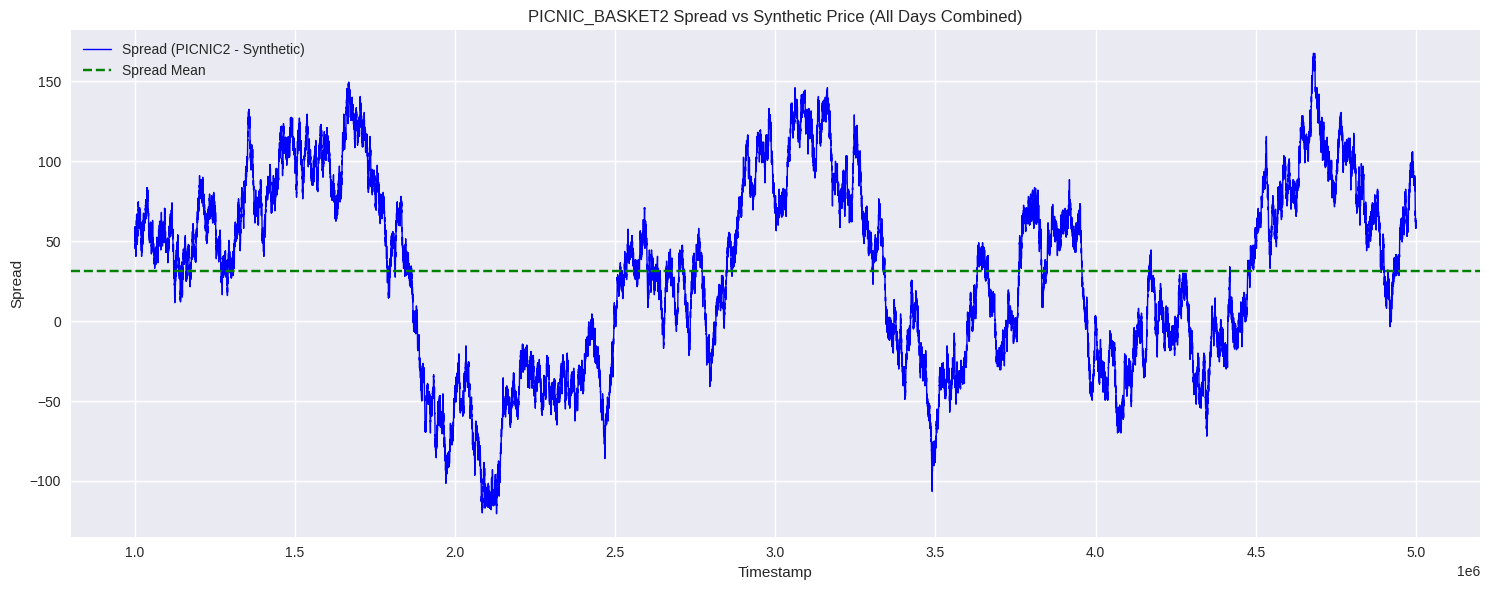

In [37]:
#spread PICNIC2

import pandas as pd
import matplotlib.pyplot as plt




# Step 2: Filter and rename columns per product
picnic2_df = df.loc[df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['weighted'] = (
    4 * merged_df['croissant'] +
    0 * merged_df['djembes'] +
    2 * merged_df['jams']
)
merged_df['spread'] = merged_df['picnic2'] - merged_df['weighted']

# Step 5: Compute and print overall spread mean
spread_mean = merged_df['spread'].mean()
print("Spread mean over all days:", spread_mean)

# Step 6: Plot spread and mean line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['spread'], label='Spread (PICNIC2 - Synthetic)', color='blue', linewidth=1)

# Draw mean as dashed horizontal line
plt.axhline(y=spread_mean, color='green', linestyle='--', label='Spread Mean')

plt.title("PICNIC_BASKET2 Spread vs Synthetic Price (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Arbitrage Spread Mean over all days: 2.1501875


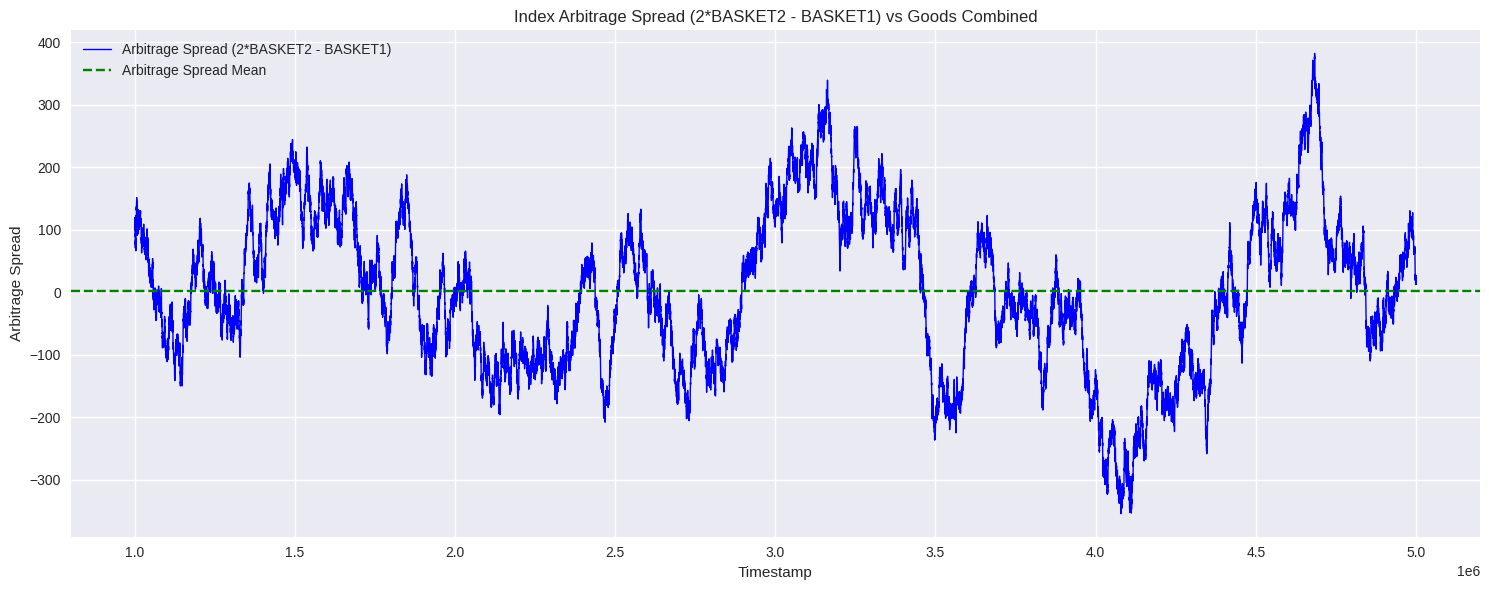

In [38]:
#SPREAD 2BSKT2 - BSKT1

import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Filter and rename columns per product
picnic2_df = df.loc[df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = df.loc[df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['arbitrage_spread'] = (
    2 * merged_df['picnic2'] -
    1 * merged_df['picnic1'] -
    2 * merged_df['croissant'] -
    1 * merged_df['jams'] +
    1 * merged_df['djembes']
)

# Step 5: Compute and print overall arbitrage spread mean
arbitrage_spread_mean = merged_df['arbitrage_spread'].mean()
print("Arbitrage Spread Mean over all days:", arbitrage_spread_mean)

# Step 6: Plot arbitrage spread and mean line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread'], label='Arbitrage Spread (2*BASKET2 - BASKET1)', color='blue', linewidth=1)

# Draw mean as dashed horizontal line
plt.axhline(y=arbitrage_spread_mean, color='green', linestyle='--', label='Arbitrage Spread Mean')

plt.title("Index Arbitrage Spread (2*BASKET2 - BASKET1) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

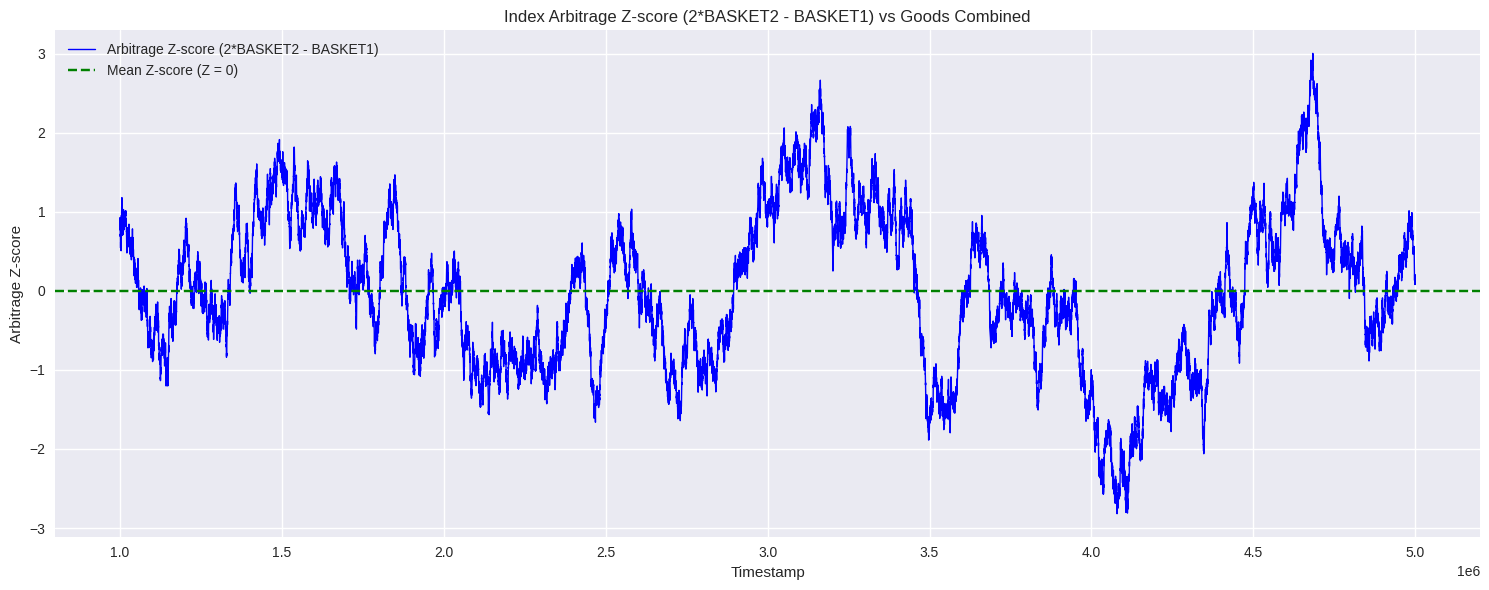

In [39]:
#"Index Arbitrage Z-score (2*BASKET2 - BASKET1) vs Goods Combined"

import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Filter and rename columns per product
picnic2_df = df.loc[df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = df.loc[df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['arbitrage_spread'] = (
    2 * merged_df['picnic2'] -
    1 * merged_df['picnic1'] -
    2 * merged_df['croissant'] -
    1 * merged_df['jams'] +
    1 * merged_df['djembes']
)

# Step 5: Compute Z-score for the arbitrage spread
mean_spread = merged_df['arbitrage_spread'].mean()
std_spread = merged_df['arbitrage_spread'].std()
merged_df['arbitrage_zscore'] = (merged_df['arbitrage_spread'] - mean_spread) / std_spread

# Step 6: Plot arbitrage Z-score and mean Z-score line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['arbitrage_zscore'], label='Arbitrage Z-score (2*BASKET2 - BASKET1)', color='blue', linewidth=1)

# Draw mean Z-score as dashed horizontal line (Z = 0)
plt.axhline(y=0, color='green', linestyle='--', label='Mean Z-score (Z = 0)')

plt.title("Index Arbitrage Z-score (2*BASKET2 - BASKET1) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Arbitrage Spread (-3ASKET2 +2BASKET1) Mean: 27.14675
Arbitrage Spread (Croissant -Jam) Mean: -2284.4621125


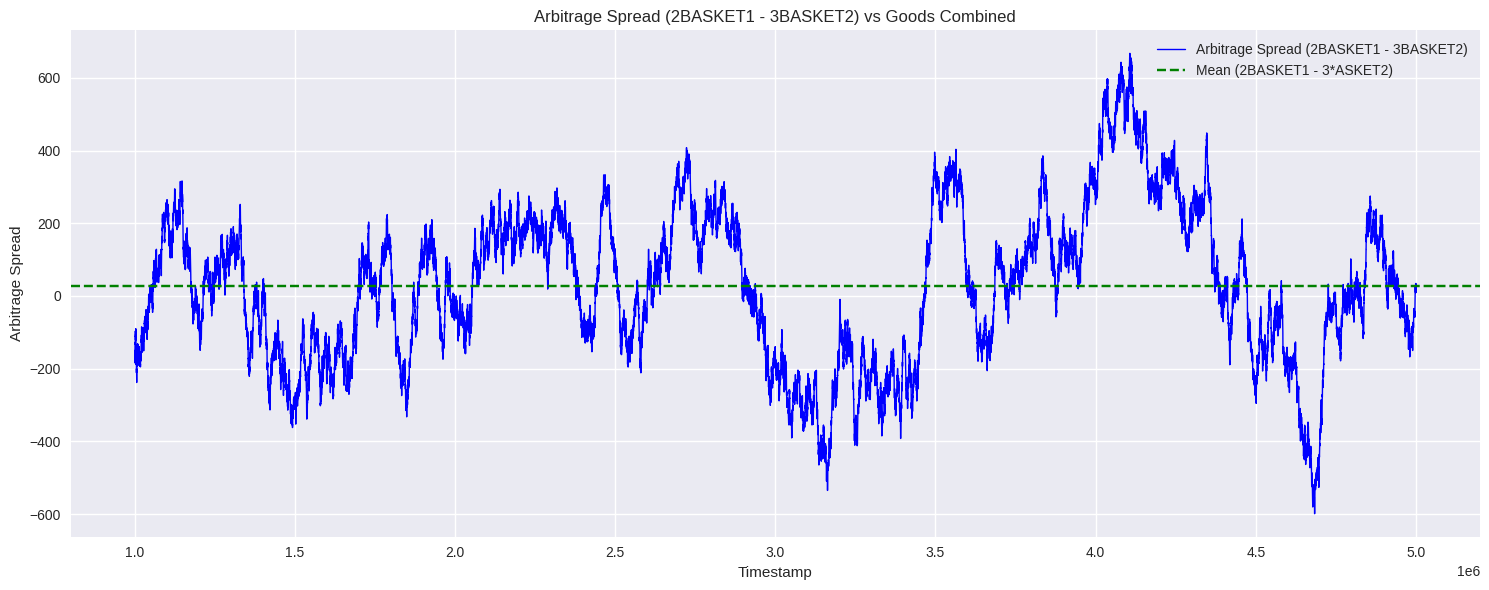

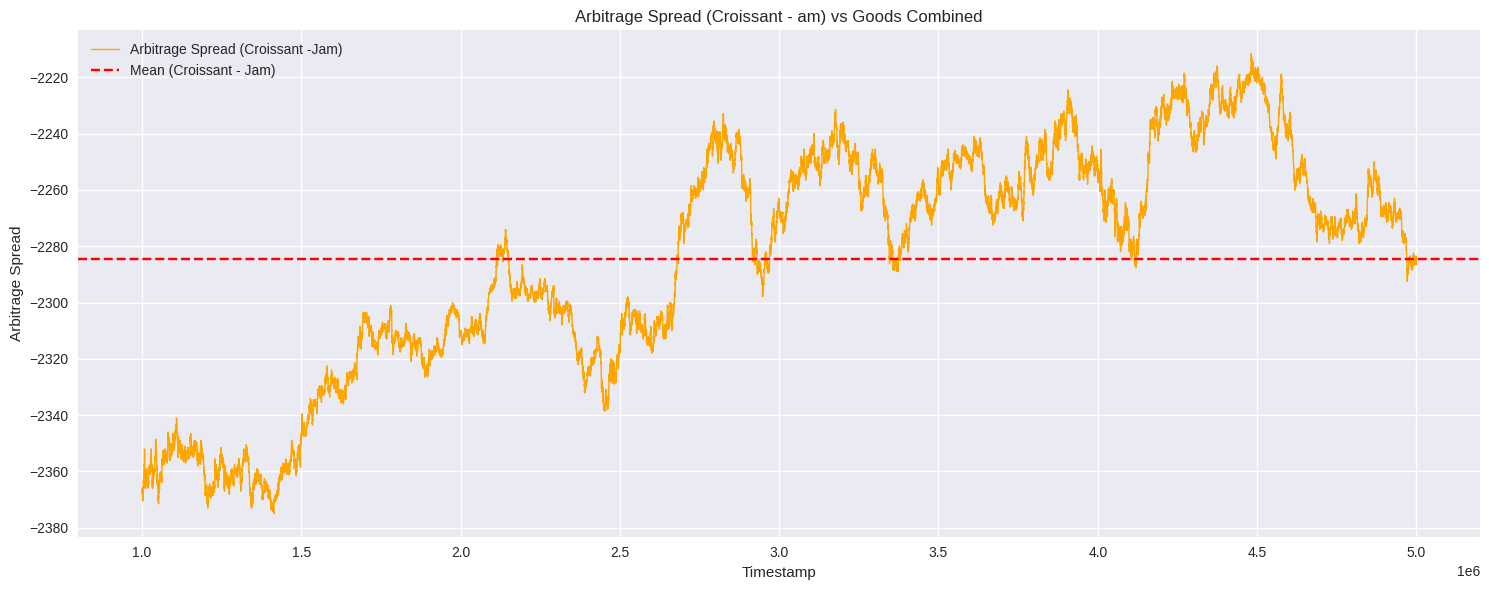

In [42]:
#Arbitrage Spread (2BASKET1 - 3BASKET2) vs Goods Combined

import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Filter and rename columns per product
picnic2_df = df.loc[df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = df.loc[df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Formula 1: Calculate Arbitrage Spread for 2*BASKET2 - 3*BASKET1 = 2*DJEMBE
merged_df['arbitrage_spread_basket1'] = (
    - 3 * merged_df['picnic2'] +
    2 * merged_df['picnic1'] -
    2 * merged_df['djembes']
)

# Formula 2: Correct Arbitrage Spread for Croissant + Jam (no multiplier for Croissant)
merged_df['arbitrage_spread_croissant_jam'] = (
    1 * merged_df['croissant'] - 
    1 * merged_df['jams']
)

# Step 5: Compute and print overall arbitrage spread means for both formulas
arbitrage_spread_basket1_mean = merged_df['arbitrage_spread_basket1'].mean()
arbitrage_spread_croissant_jam_mean = merged_df['arbitrage_spread_croissant_jam'].mean()

print("Arbitrage Spread (-3ASKET2 +2BASKET1) Mean:", arbitrage_spread_basket1_mean)
print("Arbitrage Spread (Croissant -Jam) Mean:", arbitrage_spread_croissant_jam_mean)

# Step 6: Plot 1 - Arbitrage Spread (2*BASKET2 - 3*BASKET1)
plt.figure(figsize=(15, 6))

# Plot Arbitrage Spread (2*BASKET2 - 3*BASKET1)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_basket1'], label='Arbitrage Spread (2BASKET1 - 3BASKET2)', color='blue', linewidth=1)
plt.axhline(y=arbitrage_spread_basket1_mean, color='green', linestyle='--', label='Mean (2BASKET1 - 3*ASKET2)')

plt.title("Arbitrage Spread (2BASKET1 - 3BASKET2) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Plot 2 - Arbitrage Spread (Croissant + Jam)
plt.figure(figsize=(15, 6))

# Plot Arbitrage Spread (Croissant + Jam)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_croissant_jam'], label='Arbitrage Spread (Croissant -Jam)', color='orange', linewidth=1)
plt.axhline(y=arbitrage_spread_croissant_jam_mean, color='red', linestyle='--', label='Mean (Croissant - Jam)')

plt.title("Arbitrage Spread (Croissant - am) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

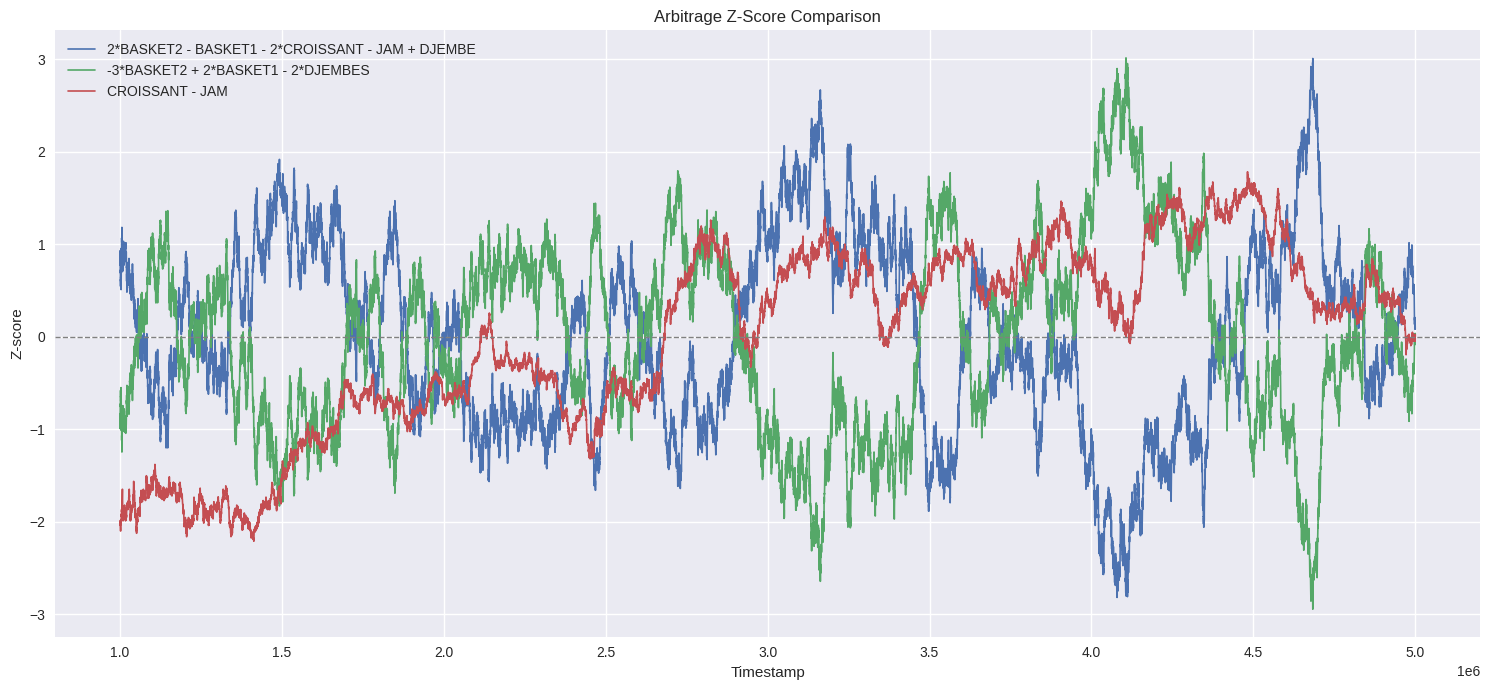

In [43]:
#z SCORES

import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Filter and rename columns per product
picnic2_df = df.loc[df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = df.loc[df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4a: Original Arbitrage Spread (combined goods vs baskets)
merged_df['arbitrage_spread'] = (
    2 * merged_df['picnic2'] -
    1 * merged_df['picnic1'] -
    2 * merged_df['croissant'] -
    1 * merged_df['jams'] +
    1 * merged_df['djembes']
)

# Step 4b: Arbitrage Spread between baskets
merged_df['arbitrage_spread_basket1'] = (
    - 3 * merged_df['picnic2'] +
    2 * merged_df['picnic1'] -
    2 * merged_df['djembes']
)

# Step 4c: Arbitrage between Croissant and Jam
merged_df['arbitrage_spread_croissant_jam'] = (
    merged_df['croissant'] - merged_df['jams']
)

# Step 5: Z-scores
for col in ['arbitrage_spread', 'arbitrage_spread_basket1', 'arbitrage_spread_croissant_jam']:
    z_col = col + '_zscore'
    mean = merged_df[col].mean()
    std = merged_df[col].std()
    merged_df[z_col] = (merged_df[col] - mean) / std

# Step 6: Plot all Z-scores together
plt.figure(figsize=(15, 7))
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_zscore'], label='2*BASKET2 - BASKET1 - 2*CROISSANT - JAM + DJEMBE', linewidth=1.2)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_basket1_zscore'], label='-3*BASKET2 + 2*BASKET1 - 2*DJEMBES', linewidth=1.2)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_croissant_jam_zscore'], label='CROISSANT - JAM', linewidth=1.2)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title("Arbitrage Z-Score Comparison")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

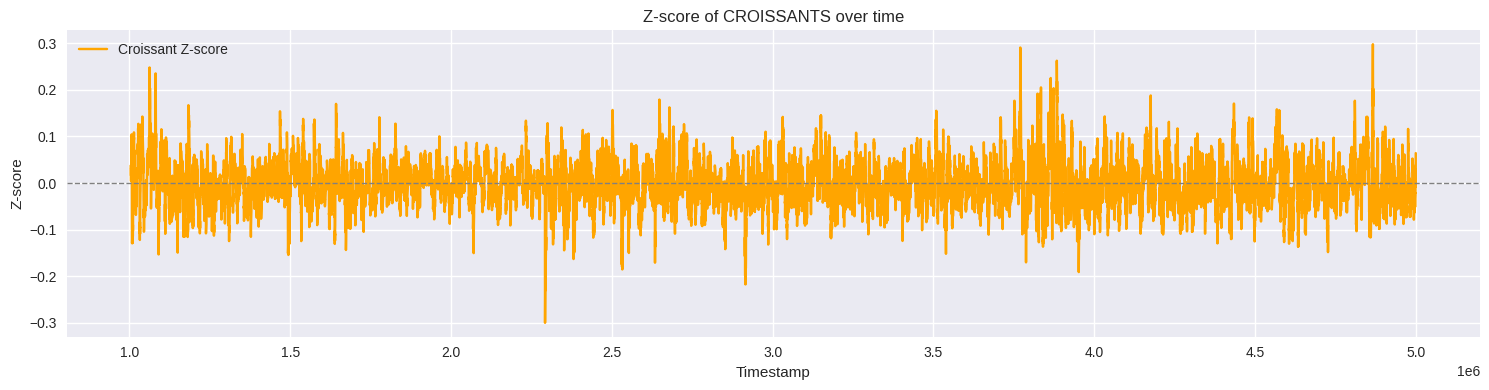

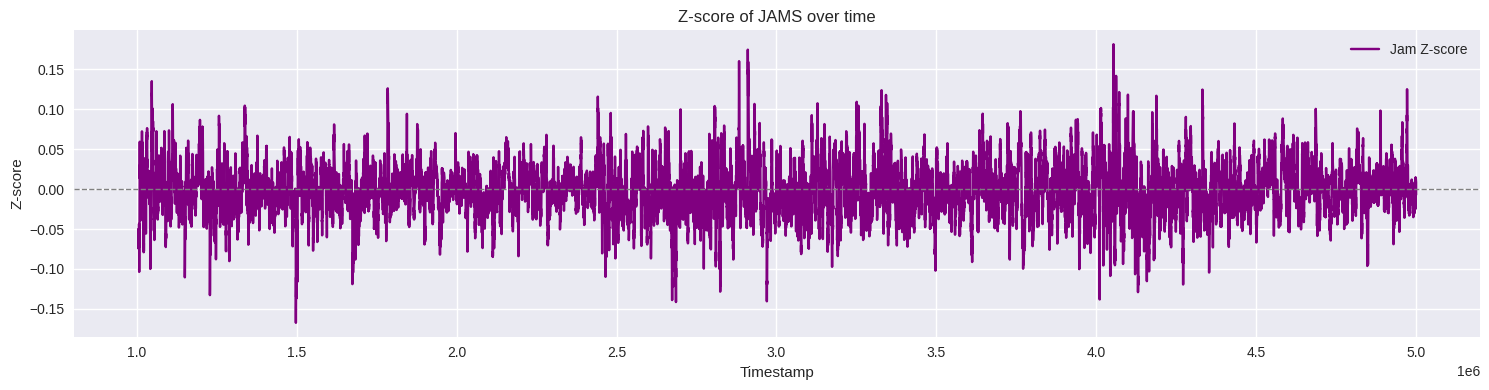

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os
window = 50
# Step 1: Combine all days
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename per product
picnic2_df = df.loc[df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = df.loc[df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = df.loc[df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = df.loc[df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = df.loc[df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp') \
                      .merge(croissant_df, on='timestamp') \
                      .merge(djembes_df, on='timestamp') \
                      .merge(jams_df, on='timestamp')

# Step 4: Compute Z-scores for Croissant and Jam
merged_df['croissant_zscore'] = (merged_df['croissant'] - merged_df['croissant'].rolling(window).mean()) / merged_df['croissant'].std()
merged_df['jam_zscore'] = (merged_df['jams'] - merged_df['jams'].rolling(window).mean()) / merged_df['jams'].std()

# Step 5: Plot Croissant Z-score
plt.figure(figsize=(15, 4))
plt.plot(merged_df['timestamp'], merged_df['croissant_zscore'], label='Croissant Z-score', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Z-score of CROISSANTS over time")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Plot Jam Z-score
plt.figure(figsize=(15, 4))
plt.plot(merged_df['timestamp'], merged_df['jam_zscore'], label='Jam Z-score', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Z-score of JAMS over time")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

